In [2]:
%load_ext autoreload
%autoreload 2

import os, pickle, random, sbmtm
# import seaborn as sns; sns.set(style="white", color_codes=True) # is not installed on system, just folder in this directory
import numpy as np
import pandas as pd
from sbmtm import sbmtm
import matplotlib.pyplot as plt

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
path_read = 'cleaned_posts/'
fname_read = '10149142-the-family-fang.json'
filename = os.path.join(path_read,fname_read)
print(filename)


cleaned_posts/10149142-the-family-fang.json


In [6]:
with open(filename,"r",encoding="utf8") as f:
    df = pd.DataFrame(pd.read_json(f))

In [7]:
df.head()

,doc,score,ups,delta,removed_words,name,raw_text,affect,posemo,negemo,anx,anger,sad,word_count
1,"[fun, read, book, actually, finish, book, disn...",5,0,-338,"[something, or, , so, it, put, up, will, the,...",ehicifj.json,i had so much fun reading this book i actuall...,9,7,2,0,0,1,54
10,"[definitely, question, sanity, give, 5, star, ...",5,0,276,"[ , so, one, someone, well, for, did, the, why...",ffcfabb.json,this is definitely one where i question my sa...,15,5,10,2,3,4,62
100,"[weird, story, hard, time, get, initially, wei...",4,0,-18,"[would, some, many, so, it, for, did, take, in...",aehibdf.json,such a weird story and i had a hard time getti...,7,3,4,0,0,0,50
1000,"[quirky, bizarre, thoroughly, think, provoke, ...",5,0,20,"[yet, was, with, out, two, i, the, made, to, a...",dgbjajh.json,such a quirky and bizarre yet thoroughly thoug...,1,0,1,0,0,0,25
1001,"[like, dysfunctional, family, story, devotion,...",3,0,-292,"[was, except, the, to, although, is, that, les...",bibdjih.json,i mostly liked this dysfunctional family story...,4,3,1,1,0,0,18


In [8]:
m_min = 100 ## minimum text length
df = df[df['word_count']>=m_min]

In [9]:
df.head()

,doc,score,ups,delta,removed_words,name,raw_text,affect,posemo,negemo,anx,anger,sad,word_count
1004,"[happy, family, alike, unhappy, family, unhapp...",4,0,420,"[something, out, are, or, so, one, it, not, fo...",fefjbce.json,"""all happy families are alike each unhappy fam...",16,9,7,0,1,6,130
1006,"[spoiler, amazing, young, fang, journey, happi...",5,0,550,"[something, are, some, so, throughout, most, i...",hedjfd.json,here be spoilers while it's amazing to see the...,28,13,14,5,3,1,232
1013,"[performance, artist, caleb, camille, fang, de...",4,0,1321,"[would, are, now, , so, many, well, back, how...",heiebic.json,performance artists caleb and camille fang de...,9,5,3,1,0,0,106
1015,"[mood, different, certainly, find, fang, messe...",4,0,-79,"[something, would, out, are, some, , already,...",ehajbje.json,i was in the mood for something different and...,25,16,8,4,4,0,105
1016,"[finally, work, book, have, read, neglect, rev...",3,0,53,"[something, out, are, without, one, quite, it,...",aajbabeh.json,i'm finally working through the books i've rea...,11,7,4,0,0,3,114


In [11]:
list_texts = list(df['doc'])
list_titles = list(df.index)
# list_titles

In [12]:
list_dt = list(df['delta'])

Text(0,0.5,'# books lenth >= m')

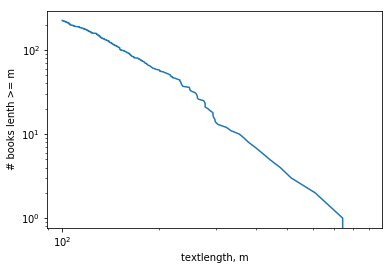

In [13]:
list_m = [len(text) for text in list_texts]
N = len(list_texts)
x = np.sort(list_m)
y = (np.arange(N)+1)

plt.plot(x,N-y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('textlength, m')
plt.ylabel('# books lenth >= m')

In [14]:
model = sbmtm()

In [15]:
model.make_graph(list_texts,documents = list_titles)

Reached 0th node


In [16]:
model.fit(min_blocks=4)

In [21]:
chosen_level=0

In [22]:
model.topics(l=chosen_level)

{0: [('happy', 0.06042296072507553),
  ('series', 0.04229607250755287),
  ('incident', 0.03625377643504532),
  ('resolution', 0.027190332326283987),
  ('unfortunately', 0.02416918429003021),
  ('challenge', 0.02416918429003021),
  ('journey', 0.02416918429003021),
  ('2011', 0.021148036253776436),
  ('message', 0.021148036253776436),
  ('vignette', 0.021148036253776436)],
 1: [('family', 0.8364485981308412), ('dysfunctional', 0.16355140186915887)],
 2: [('project', 0.05925925925925926),
  ('follow', 0.05185185185185185),
  ('emotional', 0.044444444444444446),
  ('clever', 0.03950617283950617),
  ('narrative', 0.037037037037037035),
  ('usually', 0.037037037037037035),
  ('crowd', 0.03209876543209877),
  ('distance', 0.027160493827160494),
  ('personal', 0.027160493827160494),
  ('dysfunction', 0.027160493827160494)],
 3: [('not', 0.15490196078431373),
  ('read', 0.1392156862745098),
  ('like', 0.13627450980392156),
  ('think', 0.11372549019607843),
  ('love', 0.11176470588235295),
  ('

Text(0,0.5,'fraction of posts in doc-group')

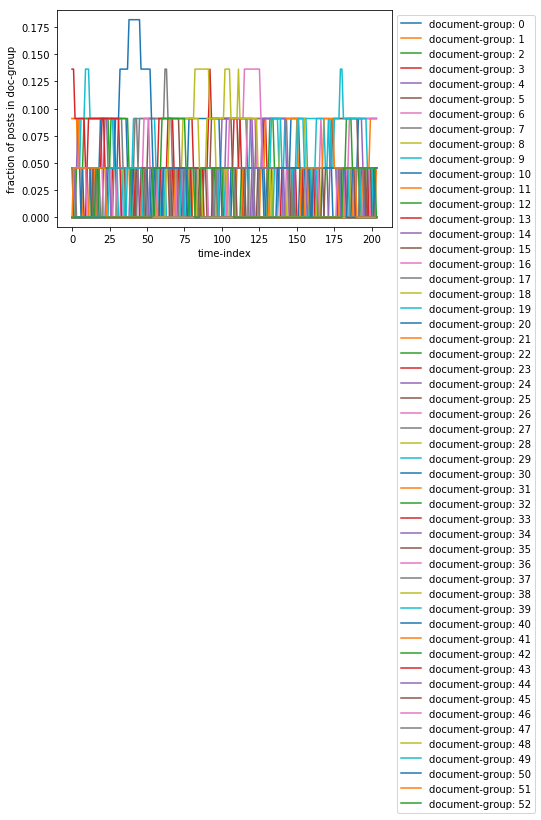

In [23]:
## group membership of doc-, and word-nodes
p_td_d,p_tw_w = model.group_membership(l=chosen_level)

D = model.get_D() ## number of documents
B_d = len(p_td_d[:,0]) ## number of doc-groups
B_w = len(p_tw_w[:,0]) ## number of word-groups

## sort docs according to time-stamp
indsort = np.argsort(list_dt)
p_td_d_sort = p_td_d[:,indsort]

## measure fraction of docs in each doc-group in a running window of length s
s = int(D/10) ## running window with s posts
arr_t_s = np.zeros((B_d,D-s))
for i in range(D-s):
    arr_t_s[:,i] = np.mean(p_td_d_sort[:,i:i+s],axis=1)

## plot
for t_w in range(B_d):
    plt.plot(arr_t_s[t_w,:],label='document-group: %s'%(t_w))
plt.legend(bbox_to_anchor=(1,1))

plt.xlabel('time-index')
plt.ylabel('fraction of posts in doc-group')

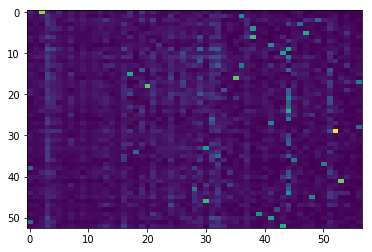

In [24]:
## fraction of tokens from doc-group td to word-group tw
p_td_tw = model.group_to_group_mixture(l=chosen_level)
np.shape(p_td_tw)
plt.imshow(p_td_tw,aspect='auto')

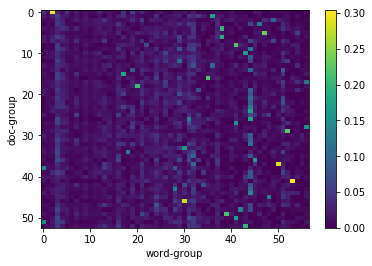

In [25]:
## conditional probability p(tw | td)
p_tw_cond_td = p_td_tw.T/np.sum(p_td_tw,axis=1)[np.newaxis,:]#[:,np.newaxis]
plt.imshow(p_tw_cond_td.T,aspect='auto')
plt.ylabel('doc-group')
plt.xlabel('word-group')
plt.colorbar()

In [26]:
## How much does each document group load on patricular topics?
result = model.get_groups(l=chosen_level)

In [27]:
p_tw_d = result['p_tw_d']

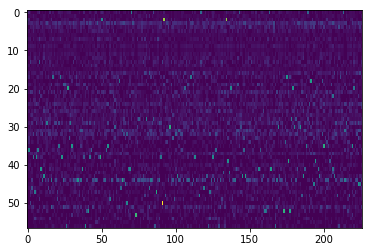

In [28]:
plt.imshow(p_tw_d,aspect='auto')

In [29]:
## how much each word-topic loads into each document
D = model.get_D()
B_w = len(p_tw_w[:,0])
p_tw_d = np.zeros(( B_w,D ))
for i in range(D):
    p_tw_d[:,i] = [ h[1] for h in model.topicdist(i,l=chosen_level) ]
    
indsort = np.argsort(list_dt)
p_tw_d = p_tw_d[:,indsort]

# indsort = np.argsort(list_dt)
# plt.imshow(p_td_w,aspect='auto',vmin=0,vmax=1)
# plt.imshow(p_td_w,aspect='auto',vmin=0,vmax=1)

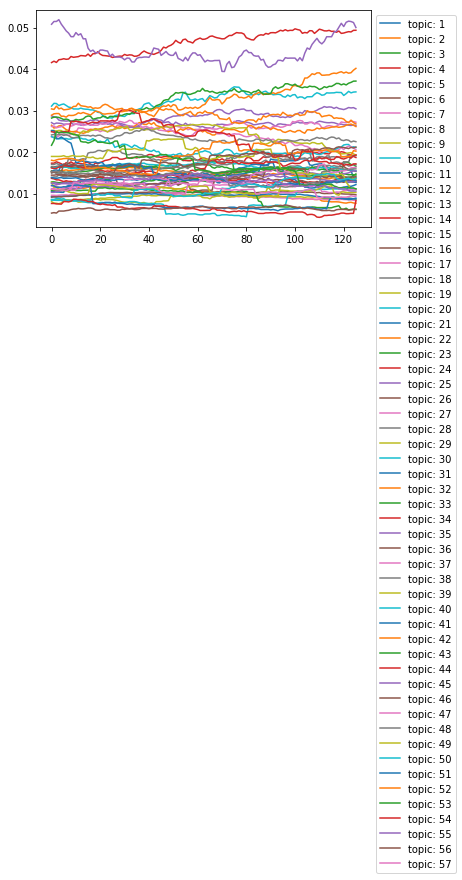

In [30]:
s = 100 ## running window with s posts
arr_t_s = np.zeros((B_w,D-s))
for i in range(D-s):
    arr_t_s[:,i] = np.mean(p_tw_d[:,i:i+s],axis=1)

for t_w in range(B_w):
    plt.plot(arr_t_s[t_w,:],label='topic: %s'%(t_w+1))
plt.legend(bbox_to_anchor=(1,1))